In [ ]:
import numpy as np
import os, time 
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Datasets/sign_mnist_train.csv")
test = pd.read_csv("/content/drive/MyDrive/Datasets/sign_mnist_test.csv")

In [ ]:
print("Training data shape: ",train.shape)
print("Testing data shape: ",test.shape)

Training data shape:  (27455, 785)
Testing data shape:  (7172, 785)


In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
#Check for missing values:

train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

Data Preparation

In [ ]:
# labels_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y'}

In [ ]:
# #reference: https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict

# train=train.replace({"label":labels_dict})

In [ ]:
# test=test.replace({"label":labels_dict})

In [ ]:
#Divide the dataset into train and test
x_train=train.drop(labels=['label'], axis=1)
x_test=test.drop(labels=['label'], axis=1)
y_train=train['label']
y_test=test['label']

In [ ]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
y_train.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [ ]:
x_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,153,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,166,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,210,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,205,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
y_test.head()

0     6
1     5
2    10
3     0
4     3
Name: label, dtype: int64

In [ ]:
print("The shape of image training is ",x_train.shape)
print("The shape of image testing is ",x_test.shape)
print("The shape of label training is ",y_train.shape)
print("The shape of label testing is ",y_test.shape)

The shape of image training is  (27455, 784)
The shape of image testing is  (7172, 784)
The shape of label training is  (27455,)
The shape of label testing is  (7172,)


Reshaping a sample image

In [ ]:
sample_image=np.array(x_train.iloc[0]).reshape((28,28))
sample_image

array([[107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
        165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
        170, 169],
       [111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160, 163, 164,
        170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172, 172, 171,
        171, 170],
       [113, 123, 131, 137, 142, 145, 150, 152, 155, 158, 161, 163, 164,
        172, 105, 142, 170, 171, 171, 171, 172, 172, 173, 173, 172, 171,
        171, 171],
       [116, 125, 133, 139, 143, 146, 151, 153, 156, 159, 162, 163, 167,
        167,  95, 144, 171, 172, 172, 172, 172, 172, 173, 173, 173, 172,
        172, 171],
       [117, 126, 134, 140, 145, 149, 153, 156, 158, 161, 163, 164, 175,
        156,  87, 154, 172, 173, 173, 173, 173, 173, 174, 174, 174, 173,
        172, 172],
       [119, 128, 136, 142, 146, 150, 153, 156, 159, 163, 165, 164, 184,
        148,  89, 164, 172, 174, 174, 174, 174, 175, 175, 174, 175, 174,
        173, 173],
       [12

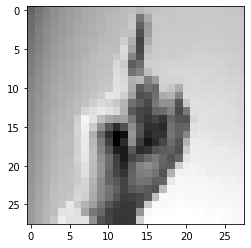

In [ ]:
#Reference: https://github.com/chenson2018/APM-Project/blob/master/Final%20Materials/Static_Signs.ipynb

plt.imshow(sample_image, cmap='gray')

In [ ]:
#Making the output categorical, Reference: https://www.geeksforgeeks.org/python-keras-keras-utils-to_categorical/
from keras.utils import to_categorical 
y_train1=to_categorical(y_train,num_classes=25)
y_test1=to_categorical(y_test,num_classes=25)

In [ ]:
y_train1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
print("The shape of label training is ",y_train1.shape)
print("The shape of label testing is ",y_test1.shape)

The shape of label training is  (27455, 25)
The shape of label testing is  (7172, 25)


In [ ]:
#Normalizing the pixels
x_train1 = x_train/255
x_test1 = x_test/255

In [ ]:
x_train1

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,0.619608,0.627451,0.639216,0.647059,0.623529,0.650980,0.658824,0.666667,0.666667,0.670588,0.670588,0.670588,0.674510,0.670588,0.670588,0.666667,0.666667,0.662745,0.435294,0.474510,0.505882,0.529412,0.552941,0.564706,0.580392,0.592157,0.603922,0.615686,0.627451,0.639216,...,0.803922,0.807843,0.807843,0.811765,0.811765,0.807843,0.807843,0.800000,0.803922,0.800000,0.796078,0.792157,0.556863,0.592157,0.627451,0.674510,0.768627,0.737255,0.737255,0.745098,0.529412,0.376471,0.337255,0.301961,0.301961,0.309804,0.690196,0.803922,0.811765,0.811765,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,0.619608,0.611765,0.603922,0.603922,0.600000,0.596078,0.592157,0.584314,0.584314,0.580392,0.576471,0.572549,0.564706,0.556863,0.560784,0.541176,0.360784,0.423529,0.619608,0.623529,0.623529,0.623529,0.627451,0.627451,0.627451,0.627451,0.627451,0.627451,0.627451,0.623529,...,0.392157,0.305882,0.470588,0.615686,0.658824,0.419608,0.388235,0.474510,0.521569,0.380392,0.372549,0.470588,0.529412,0.454902,0.372549,0.309804,0.270588,0.337255,0.545098,0.678431,0.784314,0.725490,0.686275,0.776471,0.486275,0.462745,0.368627,0.549020,0.521569,0.329412,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,0.725490,0.725490,0.725490,0.721569,0.721569,0.721569,0.709804,0.709804,0.701961,0.701961,0.701961,0.698039,0.698039,0.427451,0.203922,0.258824,0.301961,0.325490,0.737255,0.741176,0.741176,0.737255,0.737255,0.741176,0.737255,0.737255,0.737255,0.737255,0.733333,0.725490,...,0.796078,0.800000,0.796078,0.788235,0.784314,0.784314,0.780392,0.776471,0.768627,0.764706,0.760784,0.756863,0.776471,0.650980,0.517647,0.447059,0.349020,0.290196,0.309804,0.301961,0.290196,0.305882,0.517647,0.737255,0.823529,0.819608,0.807843,0.803922,0.800000,0.796078,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,0.819608,0.811765,0.815686,0.811765,0.807843,0.796078,0.792157,0.788235,0.784314,0.776471,0.772549,0.764706,0.752941,0.772549,0.670588,0.200000,0.203922,0.211765,0.831373,0.835294,0.843137,0.843137,0.831373,0.831373,0.835294,0.831373,0.831373,0.827451,0.827451,0.819608,...,0.968627,0.949020,0.913725,0.905882,0.901961,0.898039,0.890196,0.882353,0.874510,0.866667,0.862745,0.847059,0.227451,0.200000,0.192157,0.196078,0.223529,0.235294,0.066667,0.058824,0.070588,0.066667,0.074510,0.003922,0.623529,1.000000,0.929412,0.937255,0.929412,0.925490,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,0.737255,0.741176,0.741176,0.745098,0.749020,0.741176,0.745098,0.745098,0.733333,0.745098,0.752941,0.756863,0.749020,0.749020,0.752941,0.752941,0.760784,0.760784,0.650980,0.662745,0.674510,0.682353,0.694118,0.705882,0.713725,0.725490,0.729412,0.733333,0.745098,0.749020,...,0.352941,0.301961,0.345098,0.458824,0.482353,0.498039,

In [ ]:
#Reshaping the pixels values into image
x_train2 = x_train1.values.reshape(-1,28,28,1)
x_test2 = x_test1.values.reshape(-1,28,28,1)

In [ ]:
print("The shape of image training is ",x_train2.shape)
print("The shape of image testing is ",x_test2.shape)

The shape of image training is  (27455, 28, 28, 1)
The shape of image testing is  (7172, 28, 28, 1)


Defining the model

In [ ]:
model=Sequential()

In [ ]:
#First layer
model.add(Conv2D(32,(5,5), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Second Layer
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Flattening layer
model.add(Flatten())

#Fully connected layers-1
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Fully connected layers-2
model.add(Dense(25))
model.add(Activation('softmax'))

model.compile( loss='categorical_crossentropy',metrics=['accuracy'])

epochs = 10
batch_size = 64


In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [ ]:
model.fit(x_train2, y_train1, batch_size=batch_size, epochs=epochs)

Epoch 1/10
429/429 [==============================] - 6s 9ms/step - loss: 2.3154 - accuracy: 0.3045
Epoch 2/10
429/429 [==============================] - 3s 8ms/step - loss: 0.4019 - accuracy: 0.8695
Epoch 3/10
429/429 [==============================] - 3s 8ms/step - loss: 0.1384 - accuracy: 0.9556
Epoch 4/10
429/429 [==============================] - 3s 8ms/step - loss: 0.0684 - accuracy: 0.9772
Epoch 5/10
429/429 [==============================] - 3s 8ms/step - loss: 0.0417 - accuracy: 0.9864
Epoch 6/10
429/429 [==============================] - 3s 8ms/step - loss: 0.0338 - accuracy: 0.9896
Epoch 7/10
429/429 [==============================] - 3s 8ms/step - loss: 0.0270 - accuracy: 0.9911
Epoch 8/10
429/429 [==============================] - 3s 8ms/step - loss: 0.0224 - accuracy: 0.9934
Epoch 9/10
429/429 [==============================] - 3s 8ms/step - loss: 0.0215 - accuracy: 0.9933
Epoch 10/10
429/429 [==============================] - 3s 8ms/step - loss: 0.0165 - accuracy: 0.9947

In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test2,y_test1)[1]*100 , "%")

225/225 [==============================] - 1s 4ms/step - loss: 0.4086 - accuracy: 0.9465
Accuracy of the model is -  94.64584589004517 %
